In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
df = pd.read_csv("rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Modelling

In [6]:
df["SUBDIVISION"].nunique()

36

In [7]:
group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df=group.get_group(('VIDARBHA'))
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12724\1728204607.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2852,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0
2853,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7
2854,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0
2855,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9
2856,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0


In [8]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,36.8
1,1,1902,JAN,1.6
2,2,1903,JAN,5.2
3,3,1904,JAN,4.3
4,4,1905,JAN,7.3


In [9]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,36.8
115,115,1901,FEB,39.9
230,230,1901,MAR,30.9
345,345,1901,APR,26.1
460,460,1901,MAY,7.3


In [10]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [11]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [12]:
df2.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,36.8
115,115,1901,FEB,39.9
230,230,1901,MAR,30.9
345,345,1901,APR,26.1
460,460,1901,MAY,7.3


In [13]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,36.8
115,115,1901,2,39.9
230,230,1901,3,30.9
345,345,1901,4,26.1
460,460,1901,5,7.3
575,575,1901,6,129.7
690,690,1901,7,295.3
805,805,1901,8,368.8
920,920,1901,9,123.4
1035,1035,1901,10,35.2


In [14]:
df2.drop(columns="Index",inplace=True)

In [15]:
df2.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,36.8
115,1901,2,39.9


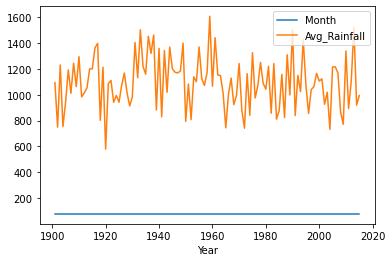

In [17]:
df2.groupby("Year").sum().plot()
plt.show()

In [19]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [20]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## 1) Decision Tree


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_train_predict=dtc.predict(X_train)
y_test_predict=dtc.predict(X_test)

In [24]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 49.221014492753625
MSE: 6770.576086956522
RMSE: 82.28351041950339

-------Train Data--------
MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [25]:
print("-----------Training Accuracy------------")
print(round(dtc.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(dtc.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
100.0
-----------Testing Accuracy------------
8.0


## b. Random Forest Classifier


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_train_predict=rfc.predict(X_train)
y_test_predict=rfc.predict(X_test)

In [28]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 45.71376811594203
MSE: 5459.155797101449
RMSE: 73.88610016167756

-------Train Data--------
MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [29]:
print("-----------Training Accuracy------------")
print(round(rfc.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(rfc.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
100.0
-----------Testing Accuracy------------
6.9


In [30]:
predicted = rfc.predict([[2011,2]])

In [31]:
predicted

array([1])

In [32]:
predicted = rfc.predict([[2003,3]])

In [33]:
predicted

array([3])

## c. SVC

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='linear') 
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_train_predict=svc.predict(X_train)
y_test_predict=svc.predict(X_test)

In [36]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.98188405797102
MSE: 26265.097826086956
RMSE: 162.0651036654312

-------Train Data--------
MAE: 89.10054347826087
MSE: 23271.352355072464
RMSE: 152.54950788210516


In [37]:
print("-----------Training Accuracy------------")
print(round(svc.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svc.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
16.5
-----------Testing Accuracy------------
15.9


## d. Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [120]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [121]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 102.15453952323351
MSE: 16248.327064937163
RMSE: 127.46892587974986
Explained Variance Score: 0.027561502102628865 2

-------Train Data--------
MAE: 95.80008074338575
MSE: 14657.15403937771
RMSE: 121.06673382633939

-----Training Accuracy-------
4.3999999999999995
-----Testing Accuracy--------
2.5


## e. Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(random_state=0)
lor.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [124]:
y_train_predict=lor.predict(X_train)
y_test_predict=lor.predict(X_test)

In [125]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.91304347826087
MSE: 26262.463768115944
RMSE: 162.05697691897115

-------Train Data--------
MAE: 89.01811594202898
MSE: 23267.681159420288
RMSE: 152.53747460680043


In [131]:
print("\n-----Training Accuracy-------")
print(round(lor.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(lor.score(X_test,y_test),3)*100)


-----Training Accuracy-------
13.8
-----Testing Accuracy--------
14.099999999999998


## Multi-layer perceptron 

In [126]:
from sklearn.neural_network import MLPClassifier

In [127]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [128]:
mlp.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [129]:
y_train_predict=mlp.predict(X_train)
y_test_predict=mlp.predict(X_test)

In [130]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.98188405797102
MSE: 26265.097826086956
RMSE: 162.0651036654312

-------Train Data--------
MAE: 89.10054347826087
MSE: 23271.352355072464
RMSE: 152.54950788210516


In [132]:
print("\n-----Training Accuracy-------")
print(round(mlp.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(mlp.score(X_test,y_test),3)*100)


-----Training Accuracy-------
16.5
-----Testing Accuracy--------
15.9


# Ensemble Stacking

## Hybrid Model 1

The stacked model with meta learner = rfc and the weak learners = dtc, svc

In [38]:
from mlxtend.classifier import StackingClassifier

In [39]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [40]:
stack = StackingClassifier(classifiers=(dtc, svc),
                            meta_classifier=rfc,
                            use_probas=False,
                            drop_proba_col=None,
                            average_probas=False,
                            verbose=0,
                            use_features_in_secondary=False,
                            store_train_meta_features=False,
                            use_clones=True,
                            fit_base_estimators=True,
                            )
stack.fit(X_train, y_train)

StackingClassifier(classifiers=(DecisionTreeClassifier(), SVC(kernel='linear')),
                   meta_classifier=RandomForestClassifier())

In [41]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [42]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 47.29347826086956
MSE: 5938.641304347826
RMSE: 77.06258044179306

-------Train Data--------
MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [43]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
100.0
-----------Testing Accuracy------------
8.0


## Hybrid Model 2

The stacked model with meta learner = dtc and the weak learners = rfc, svc

In [44]:
stack2 = StackingClassifier(classifiers=(rfc, svc),
                            meta_classifier=dtc,
                            use_probas=False,
                            drop_proba_col=None,
                            average_probas=False,
                            verbose=0,
                            use_features_in_secondary=False,
                            store_train_meta_features=False,
                            use_clones=True,
                            fit_base_estimators=True,
                            )
stack2.fit(X_train, y_train)

StackingClassifier(classifiers=(RandomForestClassifier(), SVC(kernel='linear')),
                   meta_classifier=DecisionTreeClassifier())

In [45]:
y_train_predict=stack2.predict(X_train)
y_test_predict=stack2.predict(X_test)

In [46]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 45.5036231884058
MSE: 5418.155797101449
RMSE: 73.60812317333902

-------Train Data--------
MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [47]:
print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
100.0
-----------Testing Accuracy------------
6.9


## Hybrid Model 3

meta learner = svc and the weak learners = rfc, dtc and xgboost

In [48]:
stack3 = StackingClassifier(classifiers=(rfc, svc),
                            meta_classifier=svc,
                            use_probas=False,
                            drop_proba_col=None,
                            average_probas=False,
                            verbose=0,
                            use_features_in_secondary=False,
                            store_train_meta_features=False,
                            use_clones=True,
                            fit_base_estimators=True,
                            )
stack3.fit(X_train, y_train)

StackingClassifier(classifiers=(RandomForestClassifier(), SVC(kernel='linear')),
                   meta_classifier=SVC(kernel='linear'))

In [49]:
y_train_predict=stack3.predict(X_train)
y_test_predict=stack3.predict(X_test)

In [50]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 46.416666666666664
MSE: 5637.083333333333
RMSE: 75.08051234064224

-------Train Data--------
MAE: 0.036231884057971016
MSE: 0.036231884057971016
RMSE: 0.19034674690672027


In [51]:
print("-----------Training Accuracy------------")
print(round(stack3.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack3.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
96.39999999999999
-----------Testing Accuracy------------
6.9


## Hybrid Model 4

In [52]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [53]:
xgb.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [101]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 62.27536231884058
MSE: 11760.985507246376
RMSE: 108.4480774714166

-------Train Data--------
MAE: 12.201086956521738
MSE: 1889.0851449275362
RMSE: 43.463607132031


In [55]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
84.7
-----------Testing Accuracy------------
9.8


## Voting Classifier and Pipeline (1)

In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [76]:
hybrid_models = list()

In [77]:
hm1_pipe = Pipeline([('m',stack)])
 
hybrid_models.append(('Hybrid Model 1',hm1_pipe))

In [78]:
hm2_pipe = Pipeline([('m',stack2)])
 
hybrid_models.append(('Hybrid Model 2',hm2_pipe))

In [79]:
hm3_pipe = Pipeline([('m',stack3)])
 
hybrid_models.append(('Hybrid Model 3',hm3_pipe))

In [80]:
hm4_pipe = Pipeline([('m',xgb)])
 
hybrid_models.append(('Hybrid Model 4',hm4_pipe))

In [81]:
voting_ensemble = VotingClassifier(estimators=hybrid_models, voting='hard')

In [82]:
hybrid_models

[('Hybrid Model 1',
  Pipeline(steps=[('m',
                   StackingClassifier(classifiers=(DecisionTreeClassifier(),
                                                   SVC(kernel='linear')),
                                      meta_classifier=RandomForestClassifier()))])),
 ('Hybrid Model 2',
  Pipeline(steps=[('m',
                   StackingClassifier(classifiers=(RandomForestClassifier(),
                                                   SVC(kernel='linear')),
                                      meta_classifier=DecisionTreeClassifier()))])),
 ('Hybrid Model 3',
  Pipeline(steps=[('m',
                   StackingClassifier(classifiers=(RandomForestClassifier(),
                                                   SVC(kernel='linear')),
                                      meta_classifier=SVC(kernel='linear')))])),
 ('Hybrid Model 4',
  Pipeline(steps=[('m',
                   XGBClassifier(base_score=0.5, booster='gbtree',
                                 colsample_bylevel=1,

In [92]:
cross_val = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
n_scores = cross_val_score(voting_ensemble, X, y, scoring='accuracy', cv=cross_val, n_jobs=-1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [93]:
n_scores

array([0.07971014, 0.07826087, 0.0826087 , 0.07971014])

In [94]:
n_scores.mean()

0.08007246376811594

## Voting Classifier and Pipeline (2)

In [110]:
ml_models = list()

In [111]:
dtc_pipe = Pipeline([('m',dtc)])
ml_models.append(('decision',dtc_pipe))

In [112]:
rfc_pipe = Pipeline([('m',rfc)])
ml_models.append(('RandomForest',rfc_pipe))

In [113]:
svc_pipe = Pipeline([('m',svc)])
ml_models.append(('svc',svc_pipe))

In [114]:
# voting classifier
voting_ensemble = VotingClassifier(estimators=ml_models, voting='hard')

In [115]:
ml_models

[('decision', Pipeline(steps=[('m', DecisionTreeClassifier())])),
 ('RandomForest', Pipeline(steps=[('m', RandomForestClassifier())])),
 ('svc', Pipeline(steps=[('m', SVC(kernel='linear'))]))]

In [116]:
cross_val = RepeatedStratifiedKFold(n_splits=9, n_repeats=2, random_state=1)
n_scores = cross_val_score(voting_ensemble, X, y, scoring='accuracy', cv=cross_val, n_jobs=-1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


In [117]:
n_scores

array([0.11038961, 0.11688312, 0.11688312, 0.09803922, 0.11111111,
       0.10457516, 0.11764706, 0.08496732, 0.08496732, 0.08441558,
       0.08441558, 0.09090909, 0.07843137, 0.12418301, 0.11111111,
       0.10457516, 0.09803922, 0.09150327])

In [118]:
n_scores.mean()

0.10072480170519386